# Challenge
### Status
You are a functional software engineer for FIE-systems.  

To improve the quantity tolerance of the FIE your section manager asks you to develop a new software function that can estimate the injected quantity with an error smaller than 5% for quantities bigger than 180 mm³. As the function is deployed to the ECU/vehicle it has to be robust for all influence parameters.  

Training and test data from a hydraulic testbench was measured by a colleague. bThe training data was already cleaned.  

Currently, there is no solution for this task. Up to now, all classic approaches could not solve the problem.  

### Your task

Write a program that estimates the injected quantity with an accuracy of 5% under all conditions.

https://connect.bosch.com/communities/service/html/communityview?communityUuid=813142e3-0073-44e7-86ce-7aa549ff64c5#fullpageWidgetId=W94078b9a34f9_4a6d_9b5f_3522d7601c76&file=c9c44130-c1d7-43fe-9afa-c3db2923e5b3

https://www.boschaftermarket.com/xrm/media/images/country_specific/in/services_and_support_1/downloads_10/pdf_5/bosch-fuel-injection-system-catalogue.pdf


# Getting started
## Importing Pandas and loading the training data

Import the __pandas__ library to work with the data

In [ ]:
# import pandas as pd

Load csv file for training data

In [ ]:
# dataTrain = pd.read_csv('../data/Trainingdata_p4m.csv',';') # (path,separator)

## Explore the data set

Feel free to use any search engine to help you with the following tasks!

**Task** Write code to output the number of rows and columns of dataTrain.

In [ ]:
# dataTrain.shape # return (row,column)

**Task** Get a list of column names.

In [ ]:
# dataTrain.columns

**Task** Calculate the mean of the target 'Q_Inj [mm3]'.

In [ ]:
# target = dataTrain['Q_Inj [mm3]'] # select the column Q_Inj [mm3] in dataTrain, then assign to variable 'target'

In [ ]:
# target_mean = target.mean() # calculate the mean of 'target' ,then assign to variable 'target_mean'

# print('mean(Q_Inj [mm3])', target_mean) # You will get the error here! Try to fix it

In [ ]:
# #  Other option, combine 2 lines 
# target_mean = dataTrain['Q_Inj [mm3]'].mean() # select the column Q_Inj [mm3] in dataTrain, calculate the mean of this column ,then assign to variable 'target_mean'

# target_mean

**Task** Plot a histogram of the target.

In [ ]:
#option 1: plot the 'target'
# target.hist()

In [ ]:
# #option 2: take the column 'Q_Inj [mm3]' in 'dataTrain' dataFrame, the plot it
# dataTrain.hist(column=['Q_Inj [mm3]'])

**Task** Plot histograms for all columns.

In [ ]:
# dataTrain.hist()
# # can you see any the graph ?

In [ ]:
# # If you want understand more for those parameters https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist
# dataTrain.hist(
# #                column=None, 
# #                by=None, 
# #                grid=True, 
# #                xlabelsize=9, 
# #                xrot=None, 
# #                ylabelsize=9, 
# #                yrot=90, 
# #                ax=None, 
# #                sharex=False, 
# #                sharey=False, 
#                figsize=(25,25), 
# #                layout=None, 
# #                bins=10, 
# #                backend=None, 
# #                legend=False
# )


**Task** Calculate the correlation between the target and all other columns.

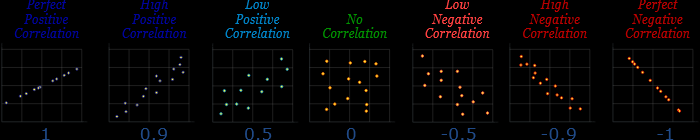

In [ ]:
# dataTrain.corrwith(target)
# # 1 --> increase -> increase
# # 0 --> not correlation
# #-1 --> increase -> decrease
# # Correlation between the target and Q_Inj [mm3]  == 1? Why

**Task** Find out which column (besides the target itself) has the highest absolute correlation with the target.

__Subtask:__
    
    Select feature columns (all data beside target)
    calculate correlation with the target
    calulate the absolute value
    select the highest column
    

In [ ]:
# # show the head of all dataframe
# dataTrain.head()
# # first column is target, all remaining is feature

In [ ]:
# # select all column except first column (target)
# features=dataTrain.iloc[:,1:] # meaning [all row, column from 1 to end]
# # show the head of feature
# features.head()
# # is it correct ?

In [ ]:
# # calculate correlation with the target
# # dataTrain.corrwith(target)
# features.corrwith(target)

In [ ]:
# # calulate the absolute value
# abs_corr_features= features.corrwith(target).abs()

# abs_corr_features

In [ ]:
# # index of maximum asolute value
# abs_corr_featurers_max=abs_corr_features.idxmax()

# abs_corr_featurers_max


In [ ]:
#---------------------------------all subtasks in one line-------------------------------
abs_corr_features_max2 = dataTrain.iloc[:,1:].corrwith(target).abs().idxmax()
#----------------------------------------------------------------------------------------
abs_corr_features_max2

**Task** Plot the scatter plot between the target and the column from the previous task.

In [ ]:
# dataTrain.plot.scatter(x=abs_corr_featurers_max,y='Q_Inj [mm3]')

**Task** Does the scatter plot or the correlations look promising, for predicting the target?

Think about the answer before scrolling further.

You need more domain knowledge to preprocess the data further.
The first information you get is:
**Domain Knowledge** In each row of the dataset, the columns named *p_transient_x [bar]* form a time series.

**Task** Visualize the p_transient time series for a single row.

In [ ]:
# transients = [f"p_transient_{i} [bar]" for i in range(1, 21)] # a list of relevant column names for your convenience
# # Your code here
# transients

In [ ]:
# # select 1 row of transients
# dataTrain.loc[1,transients]

In [ ]:
# # plot the row value
# # dataTrain.loc[1,transients].plot( )
# dataTrain.loc[1,transients].plot( figsize=(25,5))

In [ ]:
# #----------All code in one cell----------
# transients = [f"p_transient_{i} [bar]" for i in range(1, 21)] # a list of relevant column names for your convenience
# dataTrain.loc[1,transients].plot( figsize=(25,5))

**Task** Visualize the p_transient time series for a few more rows.

In [ ]:
# for i in range(10):
#     # i change from 0 to 9
#     dataTrain.loc[i,transients].plot( figsize=(25,5))    

**Domain Knowledge** For our target, the variations within individual time series are more important than across time series.
You come up with the following preprocessing function to adjust your data accordingly:

In [ ]:
# def preprocess(df):
#     transients = [f"p_transient_{i} [bar]" for i in range(1, 21)]
#     # shift the time series, so that the maximum of each series is at 0.
#     df.loc[:,transients] = df.loc[:, transients].sub(df.loc[:, transients].max(axis=1), axis=0)
#     df.loc[:,'minMax'] = df.loc[:, transients].min(axis=1).sub(df.loc[:, transients].max(axis=1), axis=0)

#     return df

**Task** Apply that function to dataTrain, so that dataTrain contains the preprocessed data.

In [ ]:
# dataTrain_pre = preprocess(dataTrain)

**Task** Visualize a few of the time series again. What is the difference to before?

In [ ]:
# for i in range(10):
#     # i change from 0 to 9
#     dataTrain_pre.loc[i,transients].plot( figsize=(25,5))    

**Task** Calculate correlations again. What changed?

In [ ]:
# dataTrain_pre.iloc[:,1:].corrwith(target).abs()

**Task** Create a scatter plot between the target and any of the highly correlated feature columns.

In [ ]:
# # --- maximum correlation index
# abs_corr_features_max_index = dataTrain_pre.iloc[:,1:].corrwith(target).abs().idxmax()
# #----------------------------------------------------------------------------------------
# abs_corr_features_max_index

In [ ]:
# dataTrain_pre.plot.scatter(x=abs_corr_features_max_index,y='Q_Inj [mm3]')

# First ML

**Task** Create a dataframe *dataTrainX* containing only the feature columns.

In [ ]:
# # dataTrainX = dataTrain_pre.loc[:,1:]
# dataTrainX = dataTrain_pre.iloc[:,1:]

# dataTrainX.head()

**Task** Create a pandas series *dataTrainY* consisting of only the target column.

In [ ]:
# dataTrainY = dataTrain_pre.iloc[:,0]

# dataTrainY.head()

**Task** Import from scikit learn: MinMax-Scaler and (MLP) Multi-Layer Perceptron.

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.neural_network import MLPRegressor 

**Task** Fit and apply the MinMax-Scaler to *dataTrainX*

In [ ]:
# scaler = MinMaxScaler()

# scaler.fit(dataTrainX)    

# dataTrainX_scale = scaler.transform(dataTrainX)

# dataTrainX_scale

**Task** Initialize a MLP.

In [ ]:
# MLP_R = MLPRegressor(hidden_layer_sizes=(20,10,5), 
#                      max_iter=1000,
#                      learning_rate='adaptive', 
#                      learning_rate_init=0.1,
#                      random_state=2)

**Task** Fit the MLP on the training data.

In [ ]:
# MLP_R.fit(dataTrainX_scale, dataTrainY)

__Compare predict and target on training dataset__

In [ ]:
# # predicted value from train data
# trainY_predict = MLP_R.predict(dataTrainX_scale)
# # dataframe between predict and target values
# import numpy as np
# compare_df=pd.DataFrame(data = np.transpose([trainY_predict,dataTrainY]), columns = ['Predict','Target'])
# compare_df.plot.scatter(x='Predict',y='Target',figsize=(10,10))


# First Evaluation

**Task** Load the test set (it's in the same folder as the training set) into a dataframe *dataTest*.

In [ ]:
# dataTest = pd.read_csv('../data/Testdata_p4m.csv',';')
# dataTest.head()

**Task** Apply the time series preprocessing to the test set.

In [ ]:
# dataTest = dataTest.iloc[:,:-1]
# dataTest_preprocessed=preprocess(dataTest)
# dataTest_preprocessed.head()

**Task** Split *dataTest* into *dataTestX* and *dataTestY*.

In [ ]:
# dataTestY=dataTest_preprocessed.iloc[:,0]

# # dataTestX = dataTest_preprocessed.loc[:,1:]
# dataTestX = dataTest_preprocessed.iloc[:,1:]

# dataTestX.head()

**Task** Apply the MinMax scaler to *dataTestX*.

In [ ]:
# dataTestX_scale = scaler.transform(dataTestX)
# dataTestX_scale

**Task** Predict on *dataTestX*.

In [ ]:
# testY_predict = MLP_R.predict(dataTestX_scale)

**Task** Evaluate your prediction.

In [ ]:
# from sklearn.metrics import r2_score

# print('r2_score = ',round(r2_score(dataTestY,testY_predict)*100,2),"%")

# MLP_R.score(dataTestX_scale, dataTestY)

__Meaning of R2 score__

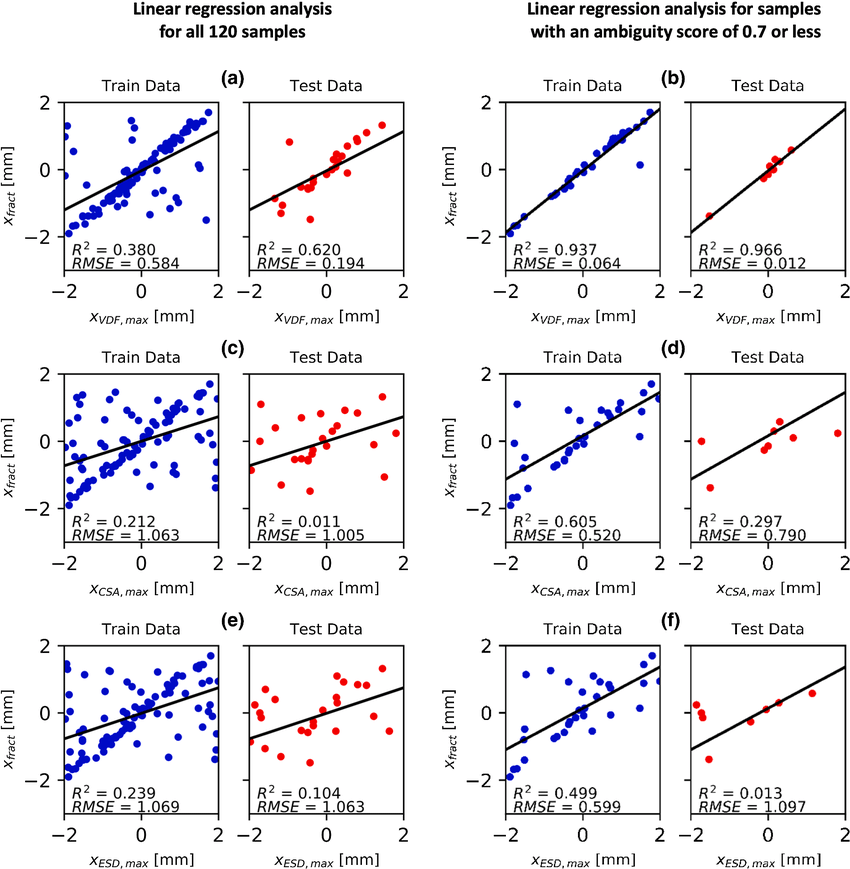